# Final Experiment for Diploma thesis Bitcoin price prediction

#### Čo obsahuje tento dokument? 

- Experimenty okrem "Predbežného experimentu z DP2"

#### Čo neobsahuje tento dokument? 

- Proces predsparcovania dát (extrakcia sentimentu, predbežný experiment (DP2)...)

#### Load all own need ipynb

In [168]:
%run Imports.ipynb
%run DataFrameBuilder.ipynb
%run ModelBuilder.ipynb
%run ModelEvaluator.ipynb
%run Trader.ipynb
%run LSTM.ipynb

In [32]:
def RefreshImports():
    %run Imports.ipynb
    %run DataFrameBuilder.ipynb
    %run ModelBuilder.ipynb
    %run ModelEvaluator.ipynb
    %run Trader.ipynb
    %run LSTM.ipynb

# Porovnanie základných a interpolovaných dát cien Nvidie


In [ ]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')
dfl = dfl.head(4776)

In [ ]:
plt.figure(figsize = (14,4))
plt.title(f'Vývoj ceny akcií Nvidia - denné dáta', fontsize = 20)
plt.xlabel("Pozorované dni", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(df.nvidia_price, label='Cena akcií Nvidia')
plt.legend(loc="upper right", prop={'size' : 16})
plt.figure(figsize = (14,4))

plt.title(f'Vývoj ceny akcií Nvidia - interpolované hodinové dáta', fontsize = 20)
plt.xlabel("Pozorované hodiny", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(dfl.nvidia_price, label='Cena akcií Nvidia')
plt.legend(loc="upper right", prop={'size': 16})


# Porovnanie ceny BTC na dennej a hodinovej granularite

In [ ]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')
dfl = dfl.head(4776)

In [ ]:
plt.figure(figsize = (14,4))
plt.title(f'Vývoj ceny Bitcoinu - denné dáta', fontsize = 20)
plt.xlabel("Pozorované dni", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(df.close_price, label='Cena Bitcoinu')
plt.legend(loc="upper right", prop={'size' : 16})
plt.figure(figsize = (14,4))

plt.title(f'Vývoj ceny Bitcoinu - hodinové dáta', fontsize = 20)
plt.xlabel("Pozorované hodiny", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(dfl.price_close, label='Cena Bitcoinu')
plt.legend(loc="upper right", prop={'size' : 16})

# Porovnanie početností tried BTC na dennej a hodinovej granularite

In [ ]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')


In [ ]:
df['target'] = df.close_price.diff()
df['target'] =  np.where(df['target']>0, 'Rise', 'Fall')
dfl['target'] = dfl.price_close.diff()
dfl['target'] =  np.where(dfl['target']>0, 'Rise', 'Fall')

In [ ]:

fig, ax =plt.subplots(1,2,figsize = (14,4))
ax[0].set_title(f'Početnosť tried nárast a pokles \n Denná granularita', fontsize = 19)

plt.grid(True)
sns.countplot(df.target, ax=ax[0] )
ax[0].set_xlabel(" ", fontsize = 16)
ax[0].set_ylabel("Počet pozorovaní", fontsize = 16)

ax[1].set_title(f'Početnosť tried nárast a pokles \n Hodinová granularita', fontsize = 19)
plt.grid(True)
sns.countplot(dfl.target, ax=ax[1])
ax[1].set_xlabel(" ", fontsize = 16)
ax[1].set_ylabel("Počet pozorovaní", fontsize = 16)

fig.show()


# Gridsearch časť

Parametre:

 - no_sample počet modelov trenovanych v gridsearchi
 - window_size - počet historických pozorovaní, ktoré sú dodatočne pridané do pozorovania
 
 - 10 behov s random splitom pre vyššiu relevantnosť výsledkov 
 - shuffle no možná aj cross validácia

In [ ]:
no_sample= 10

### Vytvorenie .csv pre výsledky gridsearchu

In [1]:
#df = Create2ClassResultDataframe()
#SaveTwoClassResult(df)

In [2]:
#df=Create3ClassResultDataframe()
#SaveThreeClassResult(df)

# Náhodný les - Binárna klasifikácia

 - Gridsearch pre binárnu klasifikáciu RF
 - 10 behov s random splitom pre vyššiu relevantnosť výsledkov 
 - shuffle no možná aj cross validácia

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]
max_depth = [ x for x in range(5,15) ]
min_samples_split = [ x for x in range(2,6) ]
min_samples_leaf = [ x for x in range(1,6) ]

In [ ]:
count = (len(window_size)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split))
for i in tqdm(window_size):
    for j in max_depth:
        for k in min_samples_split:
            for l in min_samples_leaf:
                y_testm = []
                y_predm = []
                count = count - 1 
                print(">>>>"+str(count) + "<<<<<<", end='\r')
                if(i == 0):
                    df = LoadDifferencedDatasetForTwoClass()
                else:
                    df = LoadDifferencedDatasetForTwoClass()
                    df = CreateSlidingWindows(df, windowsize= i)
                for s in range(0, no_sample):    
                    y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=j, min_samples_split=k, min_samples_leaf = l ), test_size=0.2)
                    y_testm.append(y_test)
                    y_predm.append(y_pred)
                
                model = 'Random Forest'
                param = f'window_size: {i}  max_depth: {j} min_samples_split: {k} min_samples_leaf: {l}'
                resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
                SaveTwoClassResult(resultDf)

# Náhodný les - Klasifikácia do troch tried

 - Gridsearch pre klasifikáciu do troch tried RF

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]
max_depth = [ x for x in range(5,15) ]
min_samples_split = [ x for x in range(2,6) ]
min_samples_leaf = [ x for x in range(1,6) ]

In [ ]:
count = (len(window_size)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split))
for i in tqdm(window_size):
    for j in max_depth:
        for k in min_samples_split:
            for l in min_samples_leaf:
                count = count - 1 
                y_testm = []
                y_predm = []
                print(">>>>"+str(count) + "<<<<<<", end='\r')
                if(i == 0):
                    df = LoadDifferencedDatasetForThreeClass()
                else:
                    df = LoadDifferencedDatasetForThreeClass()
                    df = CreateSlidingWindows(df, windowsize= i)
                    
                for s in range(0, no_sample):   
                    y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=j, min_samples_split=k, min_samples_leaf = l ), test_size=0.2)
                    y_testm.append(y_test)
                    y_predm.append(y_pred)
                    
                model = 'Random Forest'
                param = f'window_size: {i}  max_depth: {j} min_samples_split: {k} min_samples_leaf: {l}'
                resultDf = CreateMultipleResultAndAppendThreeClass(resultDf, model, param, y_testm, y_predm)
                SaveThreeClassResult(resultDf)

# GNB - Binárna klasifikácia

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]

In [ ]:

count = (len(window_size))
for i in tqdm(window_size):
    y_testm = []
    y_predm = []
    count = count - 1 
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForTwoClass()
    else:
        df = LoadDifferencedDatasetForTwoClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    for s in range(0, no_sample):
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB(), test_size=0.2 )    
        y_testm.append(y_test)
        y_predm.append(y_pred)
    
    model = 'GaussianNB'
    param = f'window_size: {i}'
    resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
    SaveTwoClassResult(resultDf)

# GNB - Klasifikácia do 3 tried

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]

In [ ]:
count = (len(window_size))
for i in tqdm(window_size):
    count = count - 1 
    y_testm = []
    y_predm = []
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForThreeClass()
    else:
        df = LoadDifferencedDatasetForThreeClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    for s in range(0, no_sample):  
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB(), test_size=0.2 ) 
        y_testm.append(y_test)
        y_predm.append(y_pred)
    
    model = 'GaussianNB'
    param = f'window_size: {i}'
    resultDf = CreateMultipleResultAndAppendThreeClass(resultDf, model, param, y_testm, y_predm)
    SaveThreeClassResult(resultDf)

# Binary Classification - SVC

In [ ]:
no_sample = 5

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]

In [ ]:
count = (len(window_size))
for i in tqdm(window_size):
    y_testm = []
    y_predm = []
    count = count - 1 
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForTwoClass()
    else:
        df = LoadDifferencedDatasetForTwoClass()
        df = CreateSlidingWindows(df, windowsize= i)
    for s in range(0, no_sample):
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =svm.SVC(gamma='scale') , test_size=0.2 )   
        y_testm.append(y_test)
        y_predm.append(y_pred)
        
    model = 'SVC'
    param = f'window_size: {i} gama: scale'
    resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
    SaveTwoClassResult(resultDf)

# SVC - Klasifikácia do 3 tried

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]

In [ ]:
count = (len(window_size))
for i in window_size:
    count = count - 1
    y_testm = []
    y_predm = []
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForThreeClass()
    else:
        df = LoadDifferencedDatasetForThreeClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    for s in range(0, no_sample):
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =svm.SVC(gamma='scale') , test_size=0.2 )    
        y_testm.append(y_test)
        y_predm.append(y_pred)
    
    model = 'SVC'
    param = f'window_size: {i} gama: scale'
    resultDf = CreateMultipleResultAndAppendThreeClass(resultDf, model, param, y_testm, y_predm)
    SaveThreeClassResult(resultDf)

# Binary Classification - KNN

In [ ]:
no_sample = 5

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13]
n_neighbors = [ x for x in range(5,15) ]

In [ ]:
count = (len(window_size)* len(n_neighbors))
for i in tqdm(window_size):
    for j in n_neighbors:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetForTwoClass()
        else:
            df = LoadDifferencedDatasetForTwoClass()
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =KNeighborsClassifier(n_neighbors = j) , test_size=0.2 )    
            y_testm.append(y_test)
            y_predm.append(y_pred)

        model = 'KNN'
        param = f'window_size: {i} n_neighbors: {j}'
        resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
        SaveTwoClassResult(resultDf)

# KNN - Klasifikácia do 3 tried

In [ ]:
no_sample = 5

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]
n_neighbors = [ x for x in range(5,15) ]

In [ ]:
count = (len(window_size)* len(n_neighbors))
for i in tqdm(window_size):
    for j in n_neighbors:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetForThreeClass()
        else:
            df = LoadDifferencedDatasetForThreeClass()
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =KNeighborsClassifier(n_neighbors = j) , test_size=0.2 )    
            y_testm.append(y_test)
            y_predm.append(y_pred)

        model = "KNN"
        param = f'window_size: {i}, n_neighbors: {j}'
        resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
        SaveThreeClassResult(resultDf)

# Lineárna regresia - klasický prístup  - binárna klasifikácia

In [ ]:
no_sample = 4

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13]
normalize = [True, False]

In [ ]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)
            
        for s in range(0, no_sample):
            y_test , y_pred = RegressionClassicPredictTwoClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)

        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j}'
        resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
        SaveTwoClassResult(resultDf)

# Lineárna regresia - regresný prístup

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenRegressionResultDataframe()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
count = (len(normalize)* len(window_size))
for i in window_size:
    for j in normalize:
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        y_true , y_pred = Regression(df, train_ratio=0.80)
        
        evs  = explained_variance_score(y_true, y_pred)
        me = max_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        meae = median_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)    
        
        model = "Linear Regression"
        param = f'window_size: {i}, normalize: {j}'
        resultDf = AppendToRegressionDataframe(resultDf, model, param, evs, me, mae, mse, meae, r2)
        SaveRegressionResultDataframe(resultDf)

# Lineárna regresia - klasický prístup  - klasifikácia do troch tried

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,5,10,15]
normalize = [True, False]

In [ ]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = RegressionClassicPredictThreeClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)
        
        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j}'
        resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
        SaveThreeClassResult(resultDf)

# Lineárna regresia (rolling) - predikcia vždy iba n+1 hodnoty

In [ ]:
RefreshImports()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
resultDf = OpenRegressionResultDataframe()

In [ ]:
count = (len(normalize)* len(window_size))
for i in window_size:
    for j in normalize:
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        y_true , y_pred = RegressionRolling(df, train_ratio=0.80)

        evs  = explained_variance_score(y_true, y_pred)
        me = max_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        meae = median_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        
        model = "Linear Regression"
        param = f'window_size: {i}, normalize: {j} rolling approach'
        resultDf = AppendToRegressionDataframe(resultDf, model, param, evs, me, mae, mse, meae, r2)
        SaveRegressionResultDataframe(resultDf)

# Lineárna regresia (rolling) - binárna klasifikácia

In [ ]:
window_size = [ 0,1,2,3,5,8,13]
normalize = [True, False]

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = RegressionRollingPredictTwoClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)
        
        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j} rolling approach'
        resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
        SaveTwoClassResult(resultDf)

# 3Class Linear regression - Rolling approach

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = RegressionRollingPredictThreeClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)
            
        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j} rolling approach'
        resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
        SaveThreeClassResult(resultDf)

# ARIMA Model - Binárna klasifikácia


In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
p_values = [0, 1, 2, 4, 6] #[0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            try:
                df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')
                y_test , y_pred = DefArima(df, splitRatio = 0.8, p = i, d = j, q = k)
            except:
                print(f'fail at {i} {j} {k}')
                continue           
            model = 'ARIMA'
            param = f'p: {i} d: {j} q: {k}'
            resultDf = CreateResultAndAppend(resultDf, model, param, y_test, y_pred)
            SaveTwoClassResult(resultDf)

# ARIMA Model - Klasifikácia do 3 tried


In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
p_values = [0, 1, 2, 4, 6] #[0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            try:
                df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')
                y_test , y_pred = DefArima3Class(df, splitRatio = 0.8, p = i, d = j, q = k)
            except:
                print(f'fail at {i} {j} {k}')
                continue  
            
            model = "ARIMA"
            param = f'p: {i}, d: {j}, q: {k}'
            resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
            SaveThreeClassResult(resultDf)

# ARIMA Model -Regresný prístup


In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenRegressionResultDataframe()

In [ ]:
p_values = [0, 1, 2, 4, 6] #[0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            try:
                df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')
                y_true , y_pred = DefArimaRegression(df, splitRatio = 0.8, p = i, d = j, q = k)
            except:
                print(f'fail at {i} {j} {k}')
                continue  
            
            evs  = explained_variance_score(y_true, y_pred)
            me = max_error(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            meae = median_absolute_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            
            model = "ARIMA"
            param = f'p: {i}, d: {j}, q: {k}'
            resultDf = AppendToRegressionDataframe(resultDf, model, param, evs, me, mae, mse, meae, r2)
            SaveRegressionResultDataframe(resultDf)

# Analýza výsledkov pre binárnu klasifikáciu

In [33]:
resultDf = OpenTwoClassResult()

In [34]:
len(resultDf)

1131

In [35]:
resultDf[resultDf['Model'] == 'Random Forest'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
208,Random Forest,window_size: 1 max_depth: 5 min_samples_split: 3 min_samples_leaf: 4,0.582958,0.575506,0.597800,0.711385,0.449172,0.635732,0.511962
55,Random Forest,window_size: 0 max_depth: 7 min_samples_split: 5 min_samples_leaf: 1,0.580296,0.578470,0.584805,0.667737,0.489533,0.619287,0.531974
10,Random Forest,window_size: 0 max_depth: 5 min_samples_split: 4 min_samples_leaf: 1,0.580155,0.584216,0.575707,0.665937,0.488316,0.621902,0.527687


In [36]:
resultDf[resultDf['Model'] == 'ARIMA'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
1122,ARIMA,p: 1 d: 0 q: 1,0.606615,0.600240,0.615646,0.688705,0.520863,0.641437,0.564302
1116,ARIMA,p: 0 d: 0 q: 2,0.605911,0.599760,0.614601,0.687328,0.520863,0.640565,0.563863
1115,ARIMA,p: 0 d: 0 q: 1,0.604504,0.598321,0.613288,0.687328,0.517986,0.639744,0.561622


In [37]:
resultDf[resultDf['Model'] == 'KNN'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
1018,KNN,window_size: 0 n_neighbors: 7,0.503871,0.511721,0.494838,0.550205,0.456333,0.530027,0.474530
1042,KNN,window_size: 2 n_neighbors: 11,0.497183,0.507266,0.485890,0.537100,0.456048,0.521477,0.470175
1062,KNN,window_size: 5 n_neighbors: 11,0.496479,0.517145,0.473093,0.525939,0.464326,0.521469,0.468628


In [38]:
resultDf[resultDf['Model'] == 'SVC'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
1008,SVC,window_size: 0 gama: scale,0.554117,0.560499,0.546083,0.626095,0.478023,0.591160,0.509331
1010,SVC,window_size: 2 gama: scale,0.551690,0.547688,0.558771,0.646660,0.455697,0.592629,0.501311
1011,SVC,window_size: 3 gama: scale,0.547465,0.555455,0.539463,0.626710,0.465690,0.587691,0.498139


In [39]:
resultDf[resultDf['Model'] == 'GaussianNB'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
1002,GaussianNB,window_size: 2,0.524930,0.525794,0.523718,0.725436,0.313985,0.607998,0.387374
1004,GaussianNB,window_size: 5,0.520423,0.525536,0.517180,0.693126,0.337170,0.582723,0.380456
1006,GaussianNB,window_size: 13,0.518477,0.522639,0.506057,0.768234,0.251473,0.621689,0.334142


In [40]:
resultDf[resultDf['Model'] == 'Linear Regression'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
1091,Linear Regression,window_size: 2 normalize: False,0.589437,0.592497,0.585781,0.630854,0.54611,0.611074,0.565250
1090,Linear Regression,window_size: 2 normalize: True,0.589437,0.592497,0.585781,0.630854,0.54611,0.611074,0.565250
1100,Linear Regression,window_size: 0 normalize: True rolling approach,0.585503,0.598846,0.572802,0.571625,0.60000,0.584919,0.586086


# Analýza výsledkov pre klasifikáciu do troch tried

In [41]:
resultDf = OpenThreeClassResult()

In [42]:
len(resultDf)

1101

In [43]:
resultDf[resultDf['Model'] == 'Random Forest'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,PrecisionStay,RecallRise,RecalFall,RecalStay,F1Rise,F1Fall,F1Stay
72,Random Forest,window_size: 0 max_depth: 8 min_samples_split: 4 min_samples_leaf: 3,0.445813,0.432215,0.465026,0.447487,0.429433,0.307413,0.595369,0.430498,0.369153,0.510650
71,Random Forest,window_size: 0 max_depth: 8 min_samples_split: 4 min_samples_leaf: 2,0.445226,0.425661,0.465291,0.450525,0.425448,0.319710,0.585533,0.425321,0.378538,0.509206
17,Random Forest,window_size: 0 max_depth: 5 min_samples_split: 5 min_samples_leaf: 3,0.444875,0.432161,0.464586,0.446781,0.420287,0.310387,0.599502,0.425101,0.370611,0.511649


In [44]:
resultDf[resultDf['Model'] == 'ARIMA'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,PrecisionStay,RecallRise,RecalFall,RecalStay,F1Rise,F1Fall,F1Stay
1099,ARIMA,"p: 4, d: 0, q: 2",0.409571,0.416244,0.465649,0.401647,0.181416,0.138009,0.833017,0.252696,0.212914,0.541975
1098,ARIMA,"p: 4, d: 0, q: 1",0.408867,0.405941,0.455224,0.403687,0.181416,0.138009,0.831120,0.250765,0.211806,0.543424
1097,ARIMA,"p: 4, d: 0, q: 0",0.408867,0.407035,0.458647,0.403122,0.179204,0.138009,0.833017,0.248848,0.212174,0.543317


In [45]:
resultDf[resultDf['Model'] == 'KNN'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,PrecisionStay,RecallRise,RecalFall,RecalStay,F1Rise,F1Fall,F1Stay
1020,KNN,"window_size: 0, n_neighbors: 12",0.385644,0.360382,0.347072,0.438078,0.322650,0.334029,0.500000,0.340474,0.340426,0.466995
1052,KNN,"window_size: 10, n_neighbors: 14",0.379140,0.381546,0.330233,0.413265,0.314815,0.312088,0.508368,0.344983,0.320904,0.455910
1034,KNN,"window_size: 5, n_neighbors: 6",0.376056,0.332440,0.349153,0.446389,0.256729,0.457778,0.418891,0.289720,0.396154,0.432203


In [46]:
resultDf[resultDf['Model'] == 'SVC'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,PrecisionStay,RecallRise,RecalFall,RecalStay,F1Rise,F1Fall,F1Stay
1008,SVC,window_size: 0 gama: scale,0.424349,0.416431,0.435182,0.426987,0.388433,0.250098,0.634448,0.400782,0.316428,0.510057
1009,SVC,window_size: 1 gama: scale,0.420657,0.412824,0.414163,0.428919,0.388843,0.246516,0.616795,0.400244,0.308623,0.505493
1010,SVC,window_size: 5 gama: scale,0.411737,0.400035,0.400631,0.425942,0.375799,0.251800,0.604883,0.386720,0.307272,0.499589


In [47]:
resultDf[resultDf['Model'] == 'GaussianNB'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,PrecisionStay,RecallRise,RecalFall,RecalStay,F1Rise,F1Fall,F1Stay
1007,GaussianNB,window_size: 21,0.388653,0.389490,0.358107,0.397094,0.258441,0.201890,0.703380,0.309571,0.256836,0.507327
1002,GaussianNB,window_size: 2,0.388028,0.408556,0.383079,0.386827,0.183014,0.212663,0.762324,0.248909,0.272519,0.512702
1001,GaussianNB,window_size: 1,0.387911,0.462817,0.365789,0.392132,0.085736,0.342771,0.733029,0.142466,0.353797,0.510795


In [48]:
resultDf[resultDf['Model'] == 'Linear Regression'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,PrecisionStay,RecallRise,RecalFall,RecalStay,F1Rise,F1Fall,F1Stay
1067,Linear Regression,window_size: 0 normalize: False rolling approach,0.396904,0.423841,0.480620,0.383874,0.141593,0.140271,0.831120,0.212272,0.217163,0.525180
1066,Linear Regression,window_size: 0 normalize: True rolling approach,0.396904,0.423841,0.480620,0.383874,0.141593,0.140271,0.831120,0.212272,0.217163,0.525180
1069,Linear Regression,window_size: 1 normalize: False rolling approach,0.393662,0.415205,0.468531,0.380651,0.157080,0.151927,0.798861,0.227929,0.229452,0.515615


# Analýza výsledkov regresného prístupu

In [49]:
resultDf = OpenRegressionResultDataframe()

In [50]:
resultDf.sort_values('mean_absolute_error', ascending=True).head(3)
#best O

,Model,Parameters,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
37,Linear Regression,"window_size: 0, normalize: True rolling approach",0.115388,24.842097,0.532390,1.381433,0.293383,0.115304
38,Linear Regression,"window_size: 0, normalize: False rolling approach",0.115388,24.842097,0.532390,1.381433,0.293383,0.115304
22,Linear Regression,"window_size: 0, normalize: False",0.111182,24.811791,0.536215,1.389043,0.297454,0.110431


In [51]:
resultDf.sort_values('mean_squared_error', ascending=True).head(3)
#best O

,Model,Parameters,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
1,ARIMA,"p: 0, d: 0, q: 1",0.137300,25.083497,0.536626,1.347162,0.280134,0.137253
2,ARIMA,"p: 0, d: 0, q: 2",0.136161,25.084547,0.536798,1.348947,0.278368,0.136109
8,ARIMA,"p: 1, d: 0, q: 1",0.136013,25.084651,0.536817,1.349178,0.278285,0.135961


In [52]:
resultDf.sort_values('median_absolute_error', ascending=True).head(3)
#best O

,Model,Parameters,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
8,ARIMA,"p: 1, d: 0, q: 1",0.136013,25.084651,0.536817,1.349178,0.278285,0.135961
2,ARIMA,"p: 0, d: 0, q: 2",0.136161,25.084547,0.536798,1.348947,0.278368,0.136109
16,ARIMA,"p: 4, d: 0, q: 1",0.134190,25.061385,0.537749,1.352031,0.279661,0.134134


In [53]:
resultDf.sort_values('r2_score', ascending=False).head(3)
#best 1

,Model,Parameters,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
1,ARIMA,"p: 0, d: 0, q: 1",0.137300,25.083497,0.536626,1.347162,0.280134,0.137253
2,ARIMA,"p: 0, d: 0, q: 2",0.136161,25.084547,0.536798,1.348947,0.278368,0.136109
8,ARIMA,"p: 1, d: 0, q: 1",0.136013,25.084651,0.536817,1.349178,0.278285,0.135961


# Simulátor a test Modelov


### Náhodný les - získanie najlepších parametrov z testu

In [99]:
resultDf = OpenTwoClassResult()
pd.options.display.max_colwidth = 150
resultDf[resultDf['Model'] == 'Random Forest'].sort_values('Accuracy', ascending=False).head(2)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
208,Random Forest,window_size: 1 max_depth: 5 min_samples_split: 3 min_samples_leaf: 4,0.582958,0.575506,0.597800,0.711385,0.449172,0.635732,0.511962
55,Random Forest,window_size: 0 max_depth: 7 min_samples_split: 5 min_samples_leaf: 1,0.580296,0.578470,0.584805,0.667737,0.489533,0.619287,0.531974


In [100]:
df = LoadTradeDataset2Class()

#### Run simulation with best parameter model 

In [101]:
bilance, trade_days = SimulateTradeRF(df, no_runs=150, steps=False, max_depth=7, min_samples_split=5, min_samples_leaf = 1, test_size=0.0704)




======================= GLOBAL BALANCE =======================
=========================== -26.78% ==========================





======================= GLOBAL BALANCE =======================
=========================== -21.33% ==========================





======================= GLOBAL BALANCE =======================
=========================== 81.92% ===========================





======================= GLOBAL BALANCE =======================
=========================== -8.69% ===========================





======================= GLOBAL BALANCE =======================
=========================== 25.82% ===========================





======================= GLOBAL BALANCE =======================
=========================== -10.21% ==========================





======================= GLOBAL BALANCE =======================
=========================== 6.63% ============================





======================= GLOBAL BALANCE =======================
=========================== -23.3% ===========================





======================= GLOBAL BALANCE =======================
=========================== -12.98% ==========================





======================= GLOBAL BALANCE =======================
=========================== -7.73% ===========================





======================= GLOBAL BALANCE =======================
=========================== 22.58% ===========================





======================= GLOBAL BALANCE =======================
=========================== 46.24% ===========================





======================= GLOBAL BALANCE =======================
=========================== 48.02% ===========================





======================= GLOBAL BALANCE =======================
=========================== -27.57% ==========================





======================= GLOBAL BALANCE =======================
=========================== 20.16% ===========================





======================= GLOBAL BALANCE =======================
=========================== 23.25% ===========================





======================= GLOBAL BALANCE =======================
=========================== 21.18% ===========================





======================= GLOBAL BALANCE =======================
=========================== -26.33% ==========================





======================= GLOBAL BALANCE =======================
=========================== 36.99% ===========================





======================= GLOBAL BALANCE =======================
=========================== 56.59% ===========================





======================= GLOBAL BALANCE =======================
=========================== -19.51% ==========================





======================= GLOBAL BALANCE =======================
=========================== 52.85% ===========================





======================= GLOBAL BALANCE =======================
=========================== -34.77% ==========================





======================= GLOBAL BALANCE =======================
=========================== 0.06% ============================





======================= GLOBAL BALANCE =======================
=========================== 71.04% ===========================





======================= GLOBAL BALANCE =======================
=========================== 21.79% ===========================





======================= GLOBAL BALANCE =======================
=========================== -10.18% ==========================





======================= GLOBAL BALANCE =======================
=========================== -7.5% ============================





======================= GLOBAL BALANCE =======================
=========================== 13.03% ===========================





======================= GLOBAL BALANCE =======================
=========================== 43.65% ===========================





======================= GLOBAL BALANCE =======================
=========================== 39.28% ===========================





======================= GLOBAL BALANCE =======================
=========================== -1.56% ===========================





======================= GLOBAL BALANCE =======================
=========================== -6.47% ===========================





======================= GLOBAL BALANCE =======================
=========================== 29.49% ===========================





======================= GLOBAL BALANCE =======================
=========================== 11.97% ===========================





======================= GLOBAL BALANCE =======================
=========================== 19.01% ===========================





======================= GLOBAL BALANCE =======================
=========================== -21.36% ==========================





======================= GLOBAL BALANCE =======================
=========================== 121.3% ===========================





======================= GLOBAL BALANCE =======================
=========================== 70.18% ===========================





======================= GLOBAL BALANCE =======================
=========================== -41.44% ==========================





======================= GLOBAL BALANCE =======================
=========================== 18.38% ===========================





======================= GLOBAL BALANCE =======================
=========================== 4.87% ============================





======================= GLOBAL BALANCE =======================
=========================== -6.91% ===========================





======================= GLOBAL BALANCE =======================
=========================== 17.34% ===========================





======================= GLOBAL BALANCE =======================
=========================== -15.73% ==========================





======================= GLOBAL BALANCE =======================
=========================== 50.94% ===========================





======================= GLOBAL BALANCE =======================
=========================== 2.74% ============================





======================= GLOBAL BALANCE =======================
=========================== -21.23% ==========================





======================= GLOBAL BALANCE =======================
=========================== -21.93% ==========================





======================= GLOBAL BALANCE =======================
=========================== -19.75% ==========================





======================= GLOBAL BALANCE =======================
=========================== 68.41% ===========================





======================= GLOBAL BALANCE =======================
=========================== 48.0% ============================





======================= GLOBAL BALANCE =======================
=========================== -8.91% ===========================





======================= GLOBAL BALANCE =======================
=========================== 49.35% ===========================





======================= GLOBAL BALANCE =======================
=========================== 0.04% ============================





======================= GLOBAL BALANCE =======================
=========================== 20.11% ===========================





======================= GLOBAL BALANCE =======================
=========================== 28.97% ===========================





======================= GLOBAL BALANCE =======================
=========================== -12.71% ==========================





======================= GLOBAL BALANCE =======================
=========================== 48.81% ===========================





======================= GLOBAL BALANCE =======================
=========================== 1.66% ============================





======================= GLOBAL BALANCE =======================
=========================== 122.74% ==========================





======================= GLOBAL BALANCE =======================
=========================== 2.87% ============================





======================= GLOBAL BALANCE =======================
=========================== 9.38% ============================





======================= GLOBAL BALANCE =======================
=========================== -18.17% ==========================





======================= GLOBAL BALANCE =======================
=========================== -19.32% ==========================





======================= GLOBAL BALANCE =======================
=========================== -3.87% ===========================





======================= GLOBAL BALANCE =======================
=========================== 4.82% ============================





======================= GLOBAL BALANCE =======================
=========================== -19.28% ==========================





======================= GLOBAL BALANCE =======================
=========================== -4.6% ============================





======================= GLOBAL BALANCE =======================
=========================== -30.91% ==========================





======================= GLOBAL BALANCE =======================
=========================== -8.9% ============================





======================= GLOBAL BALANCE =======================
=========================== -22.54% ==========================





======================= GLOBAL BALANCE =======================
=========================== -5.29% ===========================





======================= GLOBAL BALANCE =======================
=========================== 11.63% ===========================





======================= GLOBAL BALANCE =======================
=========================== -9.47% ===========================





======================= GLOBAL BALANCE =======================
=========================== 4.33% ============================





======================= GLOBAL BALANCE =======================
=========================== 6.89% ============================





======================= GLOBAL BALANCE =======================
=========================== 0.61% ============================





======================= GLOBAL BALANCE =======================
=========================== -2.14% ===========================





======================= GLOBAL BALANCE =======================
=========================== 42.59% ===========================





======================= GLOBAL BALANCE =======================
=========================== -16.7% ===========================





======================= GLOBAL BALANCE =======================
=========================== 19.55% ===========================





======================= GLOBAL BALANCE =======================
=========================== -2.28% ===========================





======================= GLOBAL BALANCE =======================
=========================== 7.12% ============================





======================= GLOBAL BALANCE =======================
=========================== 26.13% ===========================





======================= GLOBAL BALANCE =======================
=========================== 49.41% ===========================





======================= GLOBAL BALANCE =======================
=========================== 43.67% ===========================





======================= GLOBAL BALANCE =======================
=========================== -4.5% ============================





======================= GLOBAL BALANCE =======================
=========================== 38.35% ===========================





======================= GLOBAL BALANCE =======================
=========================== -25.78% ==========================





======================= GLOBAL BALANCE =======================
=========================== -4.28% ===========================





======================= GLOBAL BALANCE =======================
=========================== -3.56% ===========================





======================= GLOBAL BALANCE =======================
=========================== 61.29% ===========================





======================= GLOBAL BALANCE =======================
=========================== -7.53% ===========================





======================= GLOBAL BALANCE =======================
=========================== 44.73% ===========================





======================= GLOBAL BALANCE =======================
=========================== 10.77% ===========================





======================= GLOBAL BALANCE =======================
=========================== -5.85% ===========================





======================= GLOBAL BALANCE =======================
=========================== 16.86% ===========================





======================= GLOBAL BALANCE =======================
=========================== 11.37% ===========================





======================= GLOBAL BALANCE =======================
=========================== 95.03% ===========================





======================= GLOBAL BALANCE =======================
=========================== 24.75% ===========================





======================= GLOBAL BALANCE =======================
=========================== -11.82% ==========================





======================= GLOBAL BALANCE =======================
=========================== -0.6% ============================





======================= GLOBAL BALANCE =======================
=========================== -20.69% ==========================





======================= GLOBAL BALANCE =======================
=========================== -8.18% ===========================





======================= GLOBAL BALANCE =======================
=========================== 4.68% ============================





======================= GLOBAL BALANCE =======================
=========================== 1.35% ============================





======================= GLOBAL BALANCE =======================
=========================== 36.55% ===========================





======================= GLOBAL BALANCE =======================
=========================== -5.85% ===========================





======================= GLOBAL BALANCE =======================
=========================== 12.07% ===========================





======================= GLOBAL BALANCE =======================
=========================== 37.66% ===========================





======================= GLOBAL BALANCE =======================
=========================== 45.08% ===========================





======================= GLOBAL BALANCE =======================
=========================== 27.89% ===========================





======================= GLOBAL BALANCE =======================
=========================== 23.51% ===========================





======================= GLOBAL BALANCE =======================
=========================== -6.69% ===========================





======================= GLOBAL BALANCE =======================
=========================== 19.28% ===========================





======================= GLOBAL BALANCE =======================
=========================== 33.02% ===========================





======================= GLOBAL BALANCE =======================
=========================== -20.03% ==========================





======================= GLOBAL BALANCE =======================
=========================== -14.4% ===========================





======================= GLOBAL BALANCE =======================
=========================== 57.11% ===========================





======================= GLOBAL BALANCE =======================
=========================== 24.71% ===========================





======================= GLOBAL BALANCE =======================
=========================== -23.49% ==========================





======================= GLOBAL BALANCE =======================
=========================== 70.56% ===========================





======================= GLOBAL BALANCE =======================
=========================== 21.54% ===========================





======================= GLOBAL BALANCE =======================
=========================== 1.67% ============================





======================= GLOBAL BALANCE =======================
=========================== 17.24% ===========================





======================= GLOBAL BALANCE =======================
=========================== 54.44% ===========================





======================= GLOBAL BALANCE =======================
=========================== 27.09% ===========================





======================= GLOBAL BALANCE =======================
=========================== 11.87% ===========================





======================= GLOBAL BALANCE =======================
=========================== -0.83% ===========================





======================= GLOBAL BALANCE =======================
=========================== 28.34% ===========================





======================= GLOBAL BALANCE =======================
=========================== 15.85% ===========================





======================= GLOBAL BALANCE =======================
=========================== -0.14% ===========================





======================= GLOBAL BALANCE =======================
=========================== 9.24% ============================





======================= GLOBAL BALANCE =======================
=========================== 42.5% ============================





======================= GLOBAL BALANCE =======================
=========================== 5.52% ============================





======================= GLOBAL BALANCE =======================
=========================== -11.91% ==========================





======================= GLOBAL BALANCE =======================
=========================== 4.39% ============================





======================= GLOBAL BALANCE =======================
=========================== -29.16% ==========================





======================= GLOBAL BALANCE =======================
=========================== 5.12% ============================





======================= GLOBAL BALANCE =======================
=========================== 22.64% ===========================





======================= GLOBAL BALANCE =======================
=========================== -17.53% ==========================





======================= GLOBAL BALANCE =======================
=========================== 92.54% ===========================





======================= GLOBAL BALANCE =======================
=========================== -2.88% ===========================





======================= GLOBAL BALANCE =======================
=========================== 4.81% ============================





======================= GLOBAL BALANCE =======================
=========================== -21.64% ==========================





======================= GLOBAL BALANCE =======================
=========================== -7.03% ===========================





======================= GLOBAL BALANCE =======================
=========================== 10.32% ===========================





======================= GLOBAL BALANCE =======================
=========================== -16.64% ==========================





======================= GLOBAL BALANCE =======================
=========================== 11.04% ===========================



In [102]:
a = []
label = [a.append(x) for x in range(0, len(bilance))]

In [103]:
maxb = np.array(bilance).max()
minb = np.array(bilance).min()
minbt = int(minb/10) * 10 - 10
maxbt = int(maxb/10) * 10 + 10

In [104]:
bins = []
for i in range(minbt,maxbt):
    if i%5==0:
        bins.append(i)

Text(65, 70, 'Počet obchodovacích období: 500')

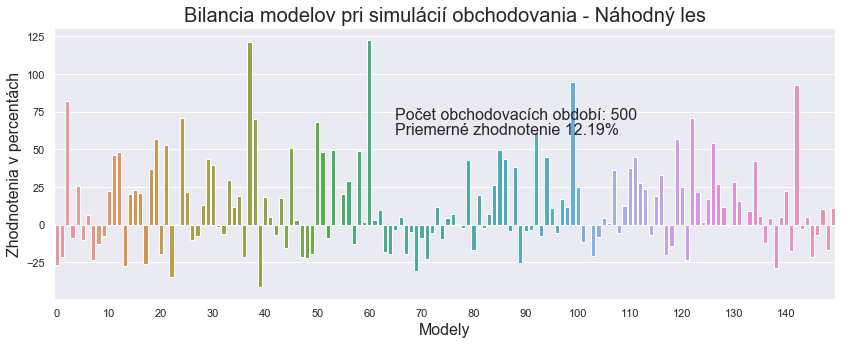

In [105]:
plt.figure(figsize = (14,5))
plt.grid(True)
plt.title(f'Bilancia modelov pri simulácií obchodovania - Náhodný les', fontsize = 20)
plt.xlabel("Modely", fontsize = 16)
plt.ylabel("Zhodnotenia v percentách", fontsize = 16)
plot_ = sns.barplot(x = a, y = bilance)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plot_.text(65, 60, f'Priemerné zhodnotenie {round(np.array(bilance).mean(), 2)}%', fontsize=16)
plot_.text(65, 70, f'Počet obchodovacích období: {trade_days}', fontsize=16)

In [106]:
len(bilance)

150

Text(30, 0.012, 'Počet modelov so zápornou bilanciou: 61')

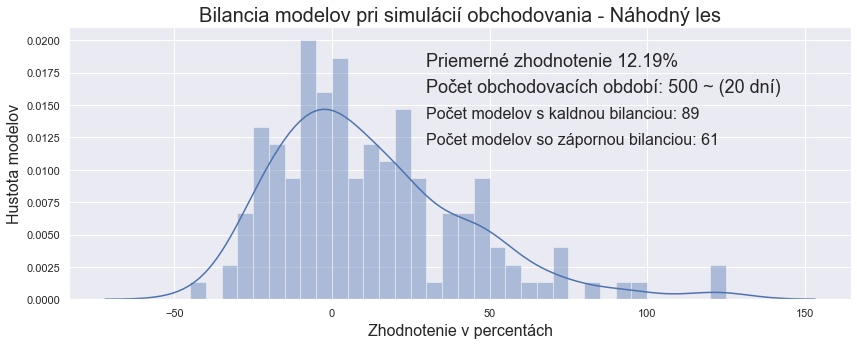

In [108]:
plt.figure(figsize = (14,5))
plt.grid(True)
plt.title(f'Bilancia modelov pri simulácií obchodovania - Náhodný les', fontsize = 20)
plt.xlabel("Zhodnotenie v percentách", fontsize = 16)
plt.ylabel("Hustota modelov", fontsize = 16)
plot_ = sns.distplot(bilance, bins=bins, color='b')

plot_.text(30, 0.018, f'Priemerné zhodnotenie {round(np.array(bilance).mean(), 2)}%', fontsize=18)
plot_.text(30, 0.016, f'Počet obchodovacích období: {trade_days} ~ ({int(trade_days/24)} dní)', fontsize=18)
plot_.text(30, 0.014, f'Počet modelov s kaldnou bilanciou: {np.count_nonzero(np.array(bilance) > 0)}', fontsize=16)
plot_.text(30, 0.012, f'Počet modelov so zápornou bilanciou: {np.count_nonzero(np.array(bilance) < 0)}', fontsize=16)

#  Train Best Own Model and Simulate

In [135]:
resultDf = OpenOwnModelDataframe()
pd.options.display.max_colwidth = 150
resultDf[resultDf['Model'] == 'Custom Model'].sort_values('Accuracy', ascending=False).head(3)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
1460,Custom Model,lr 0.001 epochs 30 optimizer Adam max_depth: 8 min_samples_split: 2 min_samples_leaf: 1,0.619155,0.654370,0.585262,0.603175,0.637349,0.627704,0.610172
1587,Custom Model,lr 0.001 epochs 30 optimizer Adam max_depth: 14 min_samples_split: 3 min_samples_leaf: 3,0.618028,0.653602,0.584161,0.601058,0.637349,0.626040,0.609434
1457,Custom Model,lr 0.001 epochs 30 optimizer Adam max_depth: 7 min_samples_split: 5 min_samples_leaf: 3,0.617183,0.653672,0.582676,0.597884,0.639157,0.624438,0.609529


In [136]:
df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')


Epoch 0 Loss: 0.0030179900774143726
Performance on test range: 0.002516623819246888


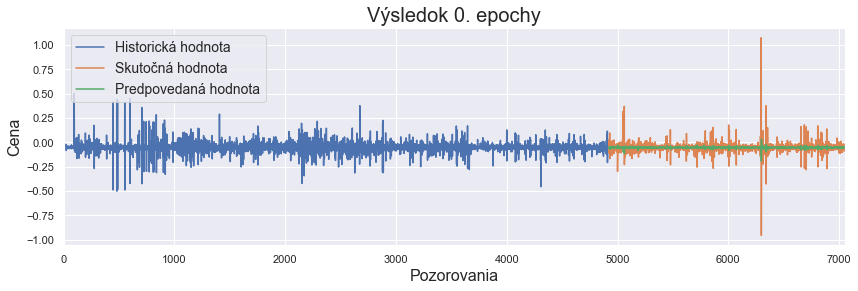

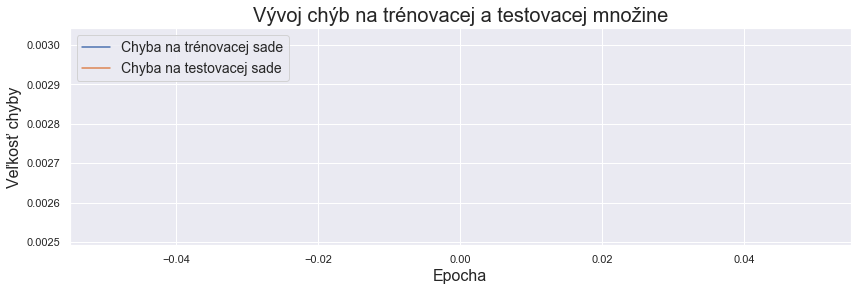


Epoch 1 Loss: 0.0028762010359781004
Performance on test range: 0.0024575258139520884


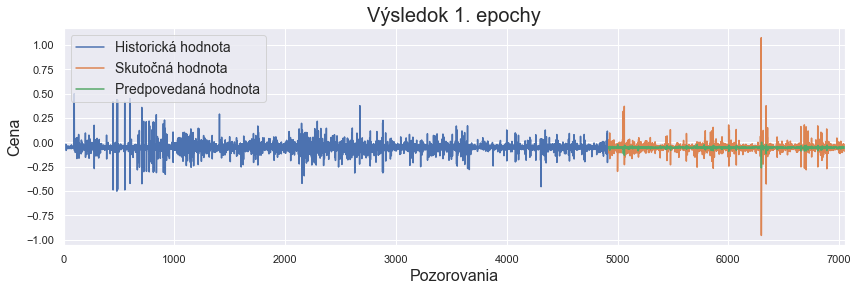

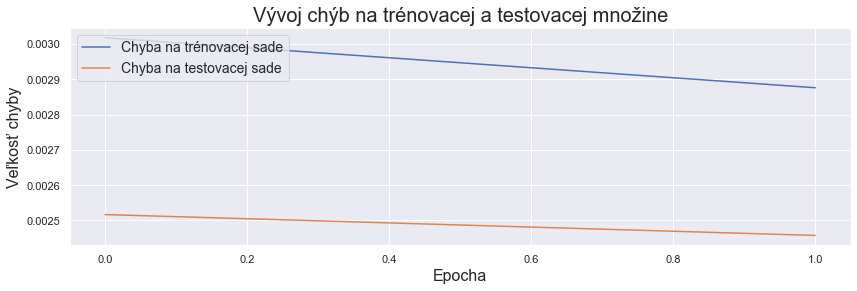


Epoch 2 Loss: 0.0028152359321769603
Performance on test range: 0.002399778924882412


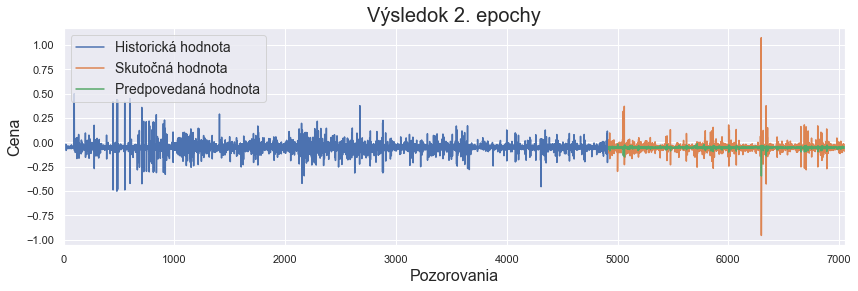

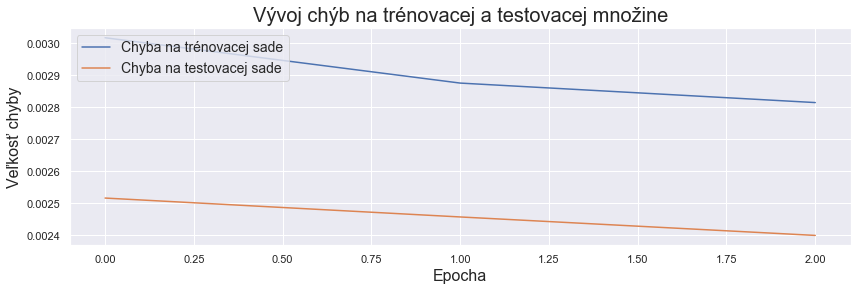


Epoch 3 Loss: 0.0027782434749251466
Performance on test range: 0.002355267060920596


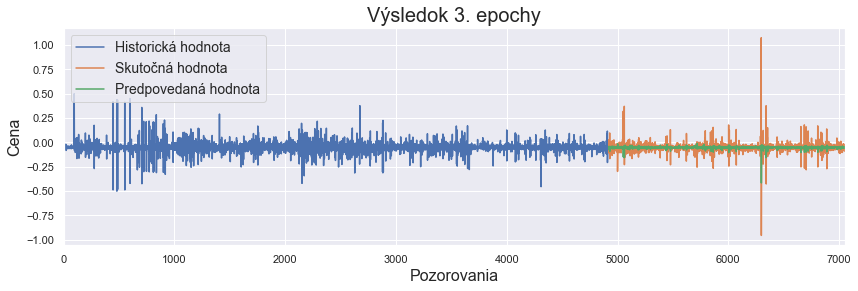

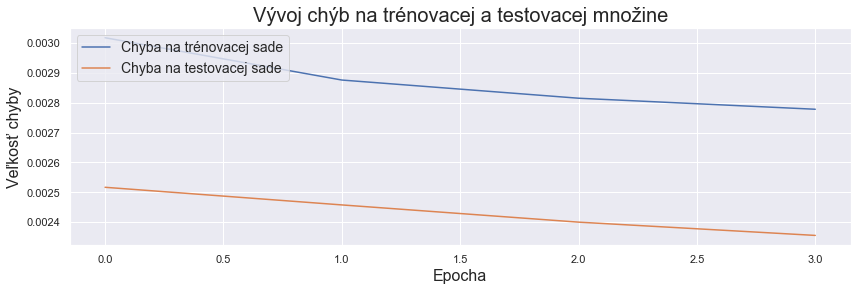


Epoch 4 Loss: 0.002750988973545573
Performance on test range: 0.0023198213893920183


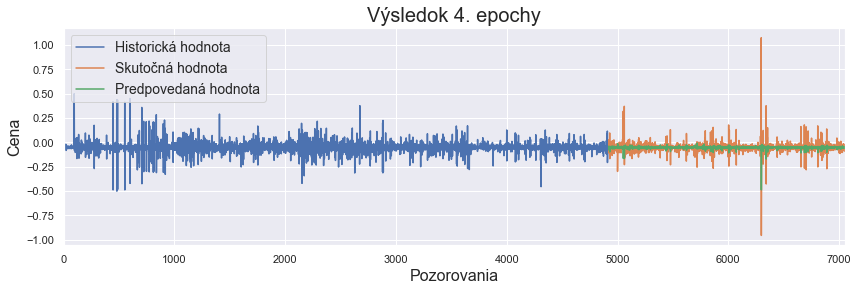

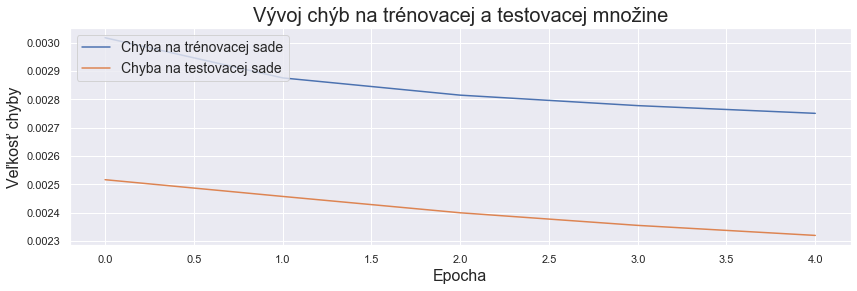


Epoch 5 Loss: 0.002729533576620816
Performance on test range: 0.0022978056222200394


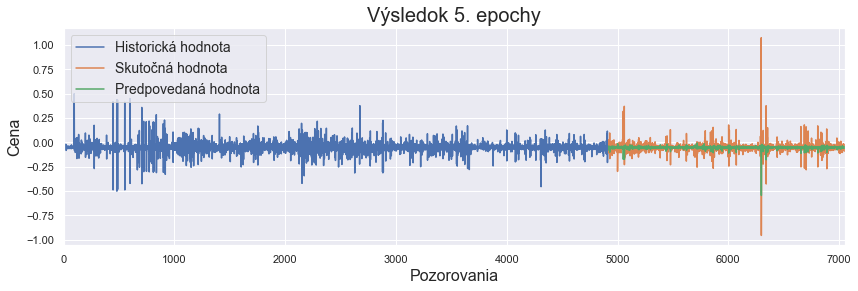

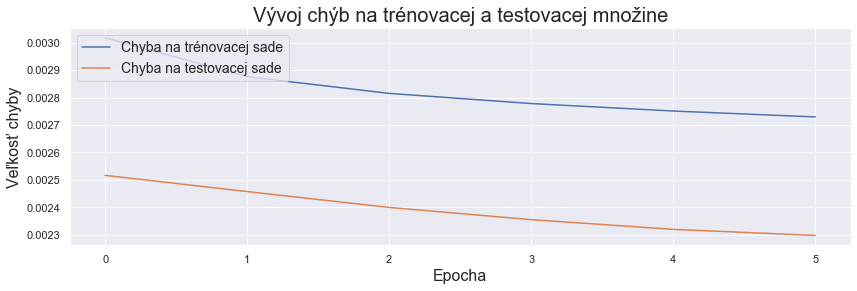


Epoch 6 Loss: 0.0027105773931328766
Performance on test range: 0.002282220870256424


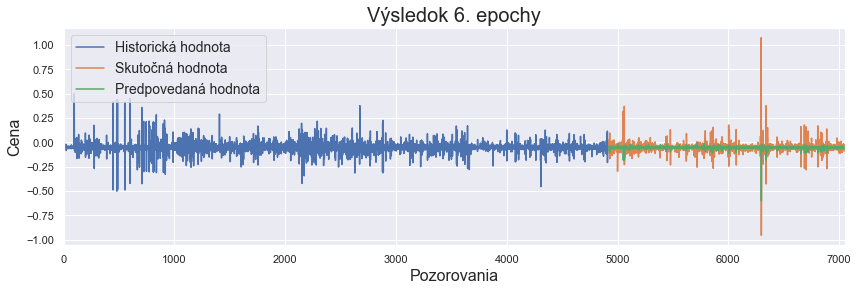

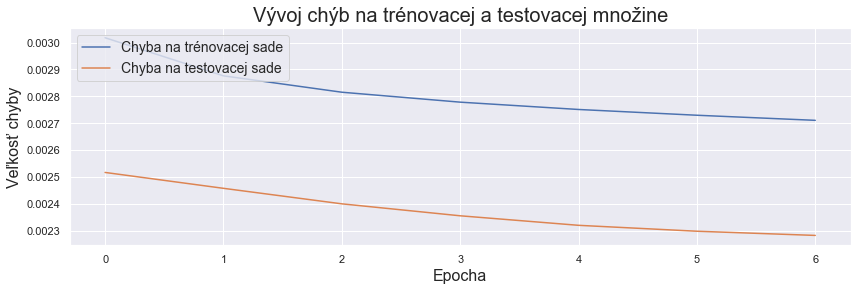


Epoch 7 Loss: 0.0026968436827572565
Performance on test range: 0.0022713213693350554


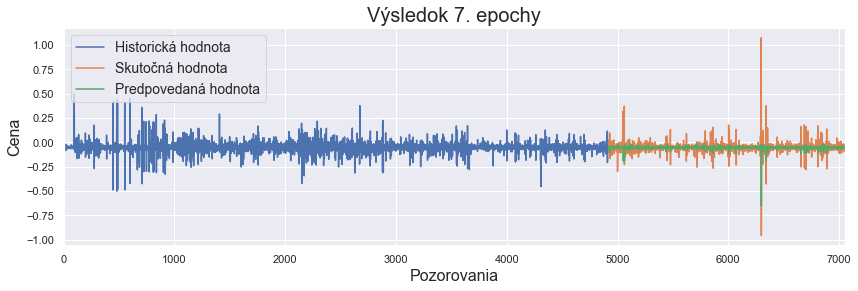

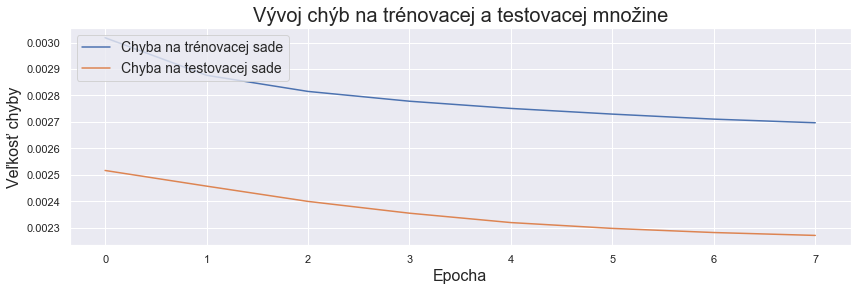


Epoch 8 Loss: 0.002683974676779528
Performance on test range: 0.0022686750162392855


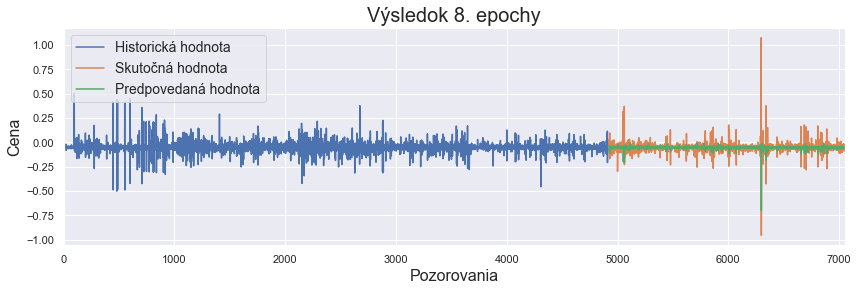

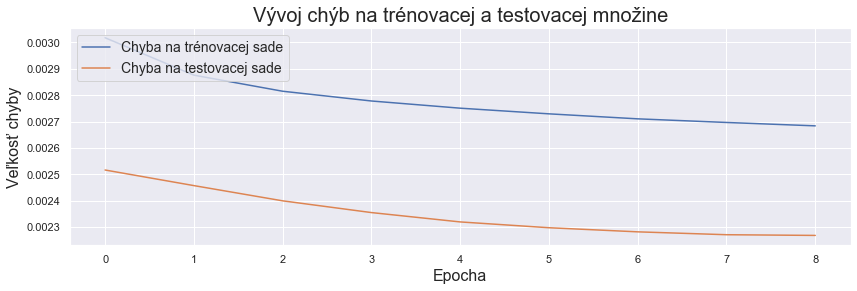


Epoch 9 Loss: 0.0026720151154230897
Performance on test range: 0.00227301730774343


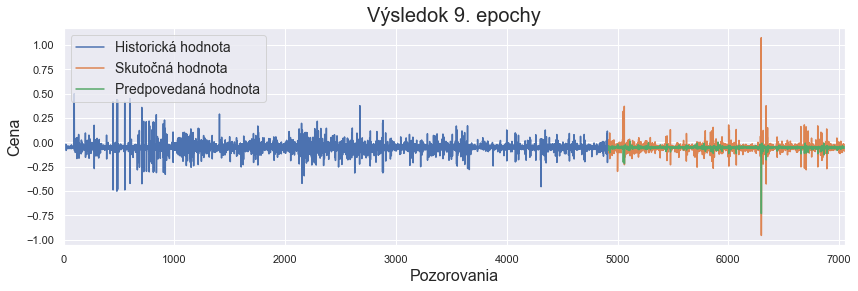

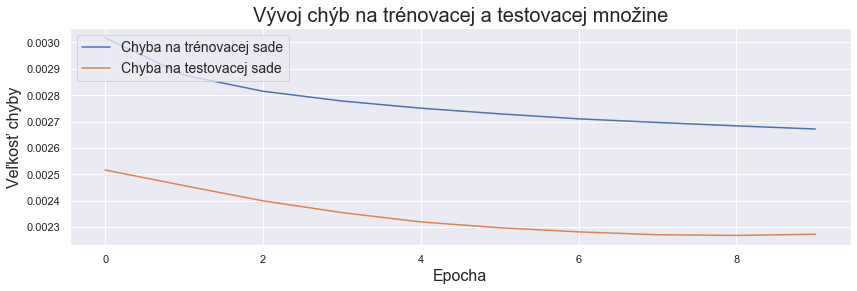


Epoch 10 Loss: 0.0026575973935934055
Performance on test range: 0.002269458957016468


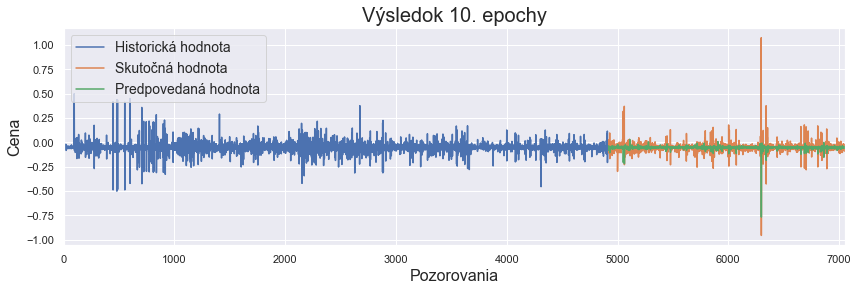

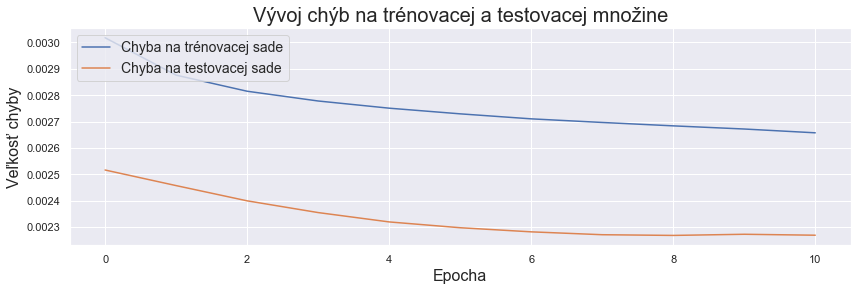


Epoch 11 Loss: 0.002645880204197768
Performance on test range: 0.0022744701709598303


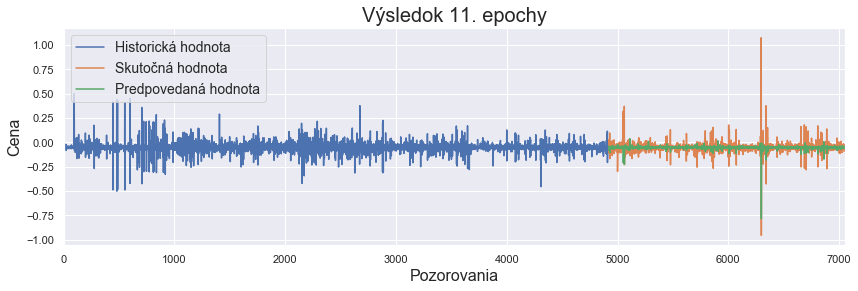

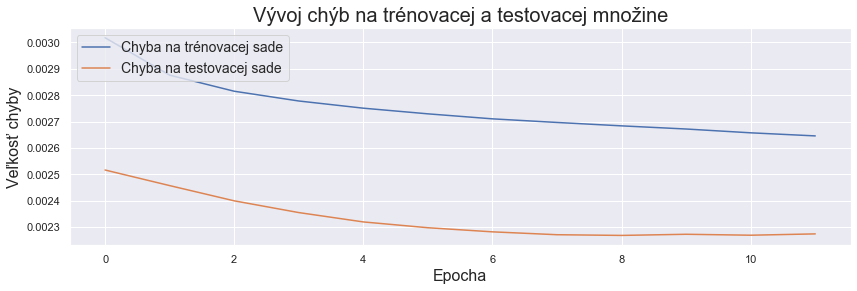

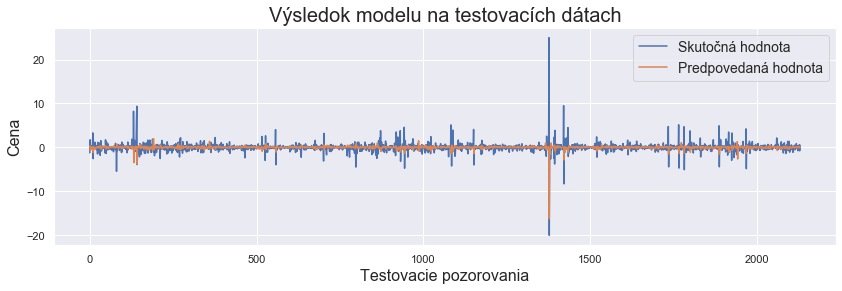

C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
df = OwnModel(target = 'percentage', split_ratio = 0.7,  optimizer = 'Adam', lr = 0.001, epochs= 12,  window_size = 50, classes = 2, gridsearch=False)

In [138]:
bilance, trade_days = SimulateTradeOwnModel(df, no_runs=150, steps=False, max_depth=8, min_samples_split=2, min_samples_leaf = 1, test_size=0.234)




======================= GLOBAL BALANCE =======================
=========================== 15.09% ===========================





======================= GLOBAL BALANCE =======================
=========================== 60.98% ===========================





======================= GLOBAL BALANCE =======================
=========================== 9.28% ============================





======================= GLOBAL BALANCE =======================
=========================== 12.75% ===========================





======================= GLOBAL BALANCE =======================
=========================== -3.05% ===========================





======================= GLOBAL BALANCE =======================
=========================== 5.78% ============================





======================= GLOBAL BALANCE =======================
=========================== 33.08% ===========================





======================= GLOBAL BALANCE =======================
=========================== 41.29% ===========================





======================= GLOBAL BALANCE =======================
=========================== 30.39% ===========================





======================= GLOBAL BALANCE =======================
=========================== -12.76% ==========================





======================= GLOBAL BALANCE =======================
=========================== 4.99% ============================





======================= GLOBAL BALANCE =======================
=========================== 1.14% ============================





======================= GLOBAL BALANCE =======================
=========================== 10.52% ===========================





======================= GLOBAL BALANCE =======================
=========================== 32.95% ===========================





======================= GLOBAL BALANCE =======================
=========================== 4.89% ============================





======================= GLOBAL BALANCE =======================
=========================== -16.93% ==========================





======================= GLOBAL BALANCE =======================
=========================== 3.13% ============================





======================= GLOBAL BALANCE =======================
=========================== 43.08% ===========================





======================= GLOBAL BALANCE =======================
=========================== 50.92% ===========================





======================= GLOBAL BALANCE =======================
=========================== -0.33% ===========================





======================= GLOBAL BALANCE =======================
=========================== -8.6% ============================





======================= GLOBAL BALANCE =======================
=========================== -2.34% ===========================





======================= GLOBAL BALANCE =======================
=========================== 15.32% ===========================





======================= GLOBAL BALANCE =======================
=========================== -33.96% ==========================





======================= GLOBAL BALANCE =======================
=========================== -3.68% ===========================





======================= GLOBAL BALANCE =======================
=========================== 43.1% ============================





======================= GLOBAL BALANCE =======================
=========================== 0.93% ============================





======================= GLOBAL BALANCE =======================
=========================== 2.59% ============================





======================= GLOBAL BALANCE =======================
=========================== -2.68% ===========================





======================= GLOBAL BALANCE =======================
=========================== 10.28% ===========================





======================= GLOBAL BALANCE =======================
=========================== -12.94% ==========================





======================= GLOBAL BALANCE =======================
=========================== 29.03% ===========================





======================= GLOBAL BALANCE =======================
=========================== 5.99% ============================





======================= GLOBAL BALANCE =======================
=========================== 4.11% ============================





======================= GLOBAL BALANCE =======================
=========================== 23.92% ===========================





======================= GLOBAL BALANCE =======================
=========================== -6.9% ============================





======================= GLOBAL BALANCE =======================
=========================== 24.64% ===========================





======================= GLOBAL BALANCE =======================
=========================== -13.7% ===========================





======================= GLOBAL BALANCE =======================
=========================== 22.35% ===========================





======================= GLOBAL BALANCE =======================
=========================== 9.93% ============================





======================= GLOBAL BALANCE =======================
=========================== 38.59% ===========================





======================= GLOBAL BALANCE =======================
=========================== 20.65% ===========================





======================= GLOBAL BALANCE =======================
=========================== 9.0% =============================





======================= GLOBAL BALANCE =======================
=========================== 2.04% ============================





======================= GLOBAL BALANCE =======================
=========================== -3.63% ===========================





======================= GLOBAL BALANCE =======================
=========================== 26.26% ===========================





======================= GLOBAL BALANCE =======================
=========================== 8.7% =============================





======================= GLOBAL BALANCE =======================
=========================== -16.26% ==========================





======================= GLOBAL BALANCE =======================
=========================== 9.41% ============================





======================= GLOBAL BALANCE =======================
=========================== 6.38% ============================





======================= GLOBAL BALANCE =======================
=========================== -9.31% ===========================





======================= GLOBAL BALANCE =======================
=========================== -19.84% ==========================





======================= GLOBAL BALANCE =======================
=========================== 2.83% ============================





======================= GLOBAL BALANCE =======================
=========================== 63.16% ===========================





======================= GLOBAL BALANCE =======================
=========================== -0.38% ===========================





======================= GLOBAL BALANCE =======================
=========================== 34.93% ===========================





======================= GLOBAL BALANCE =======================
=========================== -0.58% ===========================





======================= GLOBAL BALANCE =======================
=========================== -17.7% ===========================





======================= GLOBAL BALANCE =======================
=========================== -20.06% ==========================





======================= GLOBAL BALANCE =======================
=========================== -11.98% ==========================





======================= GLOBAL BALANCE =======================
=========================== 12.5% ============================





======================= GLOBAL BALANCE =======================
=========================== -13.07% ==========================





======================= GLOBAL BALANCE =======================
=========================== 4.24% ============================





======================= GLOBAL BALANCE =======================
=========================== 1.32% ============================





======================= GLOBAL BALANCE =======================
=========================== 34.06% ===========================





======================= GLOBAL BALANCE =======================
=========================== -14.57% ==========================





======================= GLOBAL BALANCE =======================
=========================== 12.05% ===========================





======================= GLOBAL BALANCE =======================
=========================== 53.26% ===========================





======================= GLOBAL BALANCE =======================
=========================== 26.96% ===========================





======================= GLOBAL BALANCE =======================
=========================== -4.0% ============================





======================= GLOBAL BALANCE =======================
=========================== 12.8% ============================





======================= GLOBAL BALANCE =======================
=========================== 2.74% ============================





======================= GLOBAL BALANCE =======================
=========================== 0.35% ============================





======================= GLOBAL BALANCE =======================
=========================== 17.71% ===========================





======================= GLOBAL BALANCE =======================
=========================== -13.58% ==========================





======================= GLOBAL BALANCE =======================
=========================== 18.46% ===========================





======================= GLOBAL BALANCE =======================
=========================== 14.4% ============================





======================= GLOBAL BALANCE =======================
=========================== -2.99% ===========================





======================= GLOBAL BALANCE =======================
=========================== -10.8% ===========================





======================= GLOBAL BALANCE =======================
=========================== 6.15% ============================





======================= GLOBAL BALANCE =======================
=========================== 34.72% ===========================





======================= GLOBAL BALANCE =======================
=========================== 14.74% ===========================





======================= GLOBAL BALANCE =======================
=========================== -11.38% ==========================





======================= GLOBAL BALANCE =======================
=========================== 6.0% =============================





======================= GLOBAL BALANCE =======================
=========================== 4.13% ============================





======================= GLOBAL BALANCE =======================
=========================== 24.45% ===========================





======================= GLOBAL BALANCE =======================
=========================== -29.02% ==========================





======================= GLOBAL BALANCE =======================
=========================== -1.92% ===========================





======================= GLOBAL BALANCE =======================
=========================== -22.0% ===========================





======================= GLOBAL BALANCE =======================
=========================== 8.59% ============================





======================= GLOBAL BALANCE =======================
=========================== 3.12% ============================





======================= GLOBAL BALANCE =======================
=========================== 20.18% ===========================





======================= GLOBAL BALANCE =======================
=========================== 7.47% ============================





======================= GLOBAL BALANCE =======================
=========================== 5.2% =============================





======================= GLOBAL BALANCE =======================
=========================== -8.72% ===========================





======================= GLOBAL BALANCE =======================
=========================== -10.63% ==========================





======================= GLOBAL BALANCE =======================
=========================== 41.29% ===========================





======================= GLOBAL BALANCE =======================
=========================== -3.08% ===========================





======================= GLOBAL BALANCE =======================
=========================== -3.68% ===========================





======================= GLOBAL BALANCE =======================
=========================== 12.39% ===========================





======================= GLOBAL BALANCE =======================
=========================== -15.16% ==========================





======================= GLOBAL BALANCE =======================
=========================== -3.71% ===========================





======================= GLOBAL BALANCE =======================
=========================== -1.03% ===========================





======================= GLOBAL BALANCE =======================
=========================== 10.19% ===========================





======================= GLOBAL BALANCE =======================
=========================== 19.61% ===========================





======================= GLOBAL BALANCE =======================
=========================== 23.07% ===========================





======================= GLOBAL BALANCE =======================
=========================== -19.52% ==========================





======================= GLOBAL BALANCE =======================
=========================== 8.34% ============================





======================= GLOBAL BALANCE =======================
=========================== 0.84% ============================





======================= GLOBAL BALANCE =======================
=========================== -25.91% ==========================





======================= GLOBAL BALANCE =======================
=========================== -28.79% ==========================





======================= GLOBAL BALANCE =======================
=========================== -1.41% ===========================





======================= GLOBAL BALANCE =======================
=========================== -9.63% ===========================





======================= GLOBAL BALANCE =======================
=========================== 21.84% ===========================





======================= GLOBAL BALANCE =======================
=========================== -7.84% ===========================





======================= GLOBAL BALANCE =======================
=========================== -11.71% ==========================





======================= GLOBAL BALANCE =======================
=========================== 2.79% ============================





======================= GLOBAL BALANCE =======================
=========================== -7.29% ===========================





======================= GLOBAL BALANCE =======================
=========================== 10.86% ===========================





======================= GLOBAL BALANCE =======================
=========================== -19.26% ==========================





======================= GLOBAL BALANCE =======================
=========================== -20.73% ==========================





======================= GLOBAL BALANCE =======================
=========================== -1.78% ===========================





======================= GLOBAL BALANCE =======================
=========================== 6.38% ============================





======================= GLOBAL BALANCE =======================
=========================== 14.7% ============================





======================= GLOBAL BALANCE =======================
=========================== -18.09% ==========================





======================= GLOBAL BALANCE =======================
=========================== 38.47% ===========================





======================= GLOBAL BALANCE =======================
=========================== -4.08% ===========================





======================= GLOBAL BALANCE =======================
=========================== -11.09% ==========================





======================= GLOBAL BALANCE =======================
=========================== 17.11% ===========================





======================= GLOBAL BALANCE =======================
=========================== -8.48% ===========================





======================= GLOBAL BALANCE =======================
=========================== -17.44% ==========================





======================= GLOBAL BALANCE =======================
=========================== -4.23% ===========================





======================= GLOBAL BALANCE =======================
=========================== -2.48% ===========================





======================= GLOBAL BALANCE =======================
=========================== -16.52% ==========================





======================= GLOBAL BALANCE =======================
=========================== 18.14% ===========================





======================= GLOBAL BALANCE =======================
=========================== 17.48% ===========================





======================= GLOBAL BALANCE =======================
=========================== 27.95% ===========================





======================= GLOBAL BALANCE =======================
=========================== 10.47% ===========================





======================= GLOBAL BALANCE =======================
=========================== -17.68% ==========================





======================= GLOBAL BALANCE =======================
=========================== 33.4% ============================





======================= GLOBAL BALANCE =======================
=========================== 19.83% ===========================





======================= GLOBAL BALANCE =======================
=========================== -7.87% ===========================





======================= GLOBAL BALANCE =======================
=========================== -8.6% ============================





======================= GLOBAL BALANCE =======================
=========================== 1.1% =============================





======================= GLOBAL BALANCE =======================
=========================== -13.66% ==========================





======================= GLOBAL BALANCE =======================
=========================== -5.07% ===========================





======================= GLOBAL BALANCE =======================
=========================== 10.71% ===========================





======================= GLOBAL BALANCE =======================
=========================== -0.35% ===========================





======================= GLOBAL BALANCE =======================
=========================== 15.16% ===========================





======================= GLOBAL BALANCE =======================
=========================== -3.4% ============================



In [139]:
a = []
label = [a.append(x) for x in range(0, len(bilance))]

In [140]:
maxb = np.array(bilance).max()
minb = np.array(bilance).min()
minbt = int(minb/10) * 10 - 10
maxbt = int(maxb/10) * 10 + 10
bins = []
for i in range(minbt,maxbt):
    if i%5==0:
        bins.append(i)

Text(100, 50, 'Počet obchodovacích období: 499')

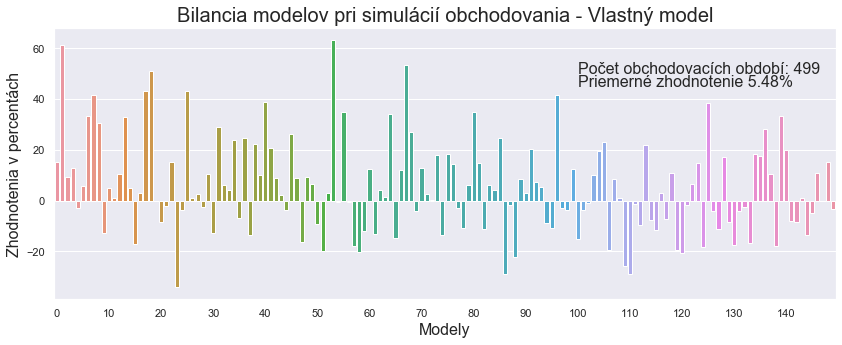

In [141]:
plt.figure(figsize = (14,5))
plt.grid(True)
plt.title(f'Bilancia modelov pri simulácií obchodovania - Vlastný model', fontsize = 20)
plt.xlabel("Modely", fontsize = 16)
plt.ylabel("Zhodnotenia v percentách", fontsize = 16)
plot_ = sns.barplot(x = a, y = bilance)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plot_.text(100, 45, f'Priemerné zhodnotenie {round(np.array(bilance).mean(), 2)}%', fontsize=16)
plot_.text(100, 50, f'Počet obchodovacích období: {trade_days}', fontsize=16)

Text(21, 0.012, 'Počet modelov so zápornou bilanciou: 64')

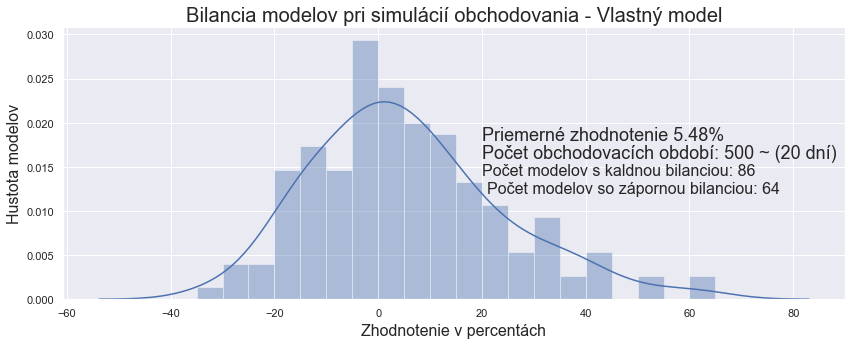

In [147]:
plt.figure(figsize = (14,5))
plt.grid(True)
plt.title(f'Bilancia modelov pri simulácií obchodovania - Vlastný model', fontsize = 20)
plt.xlabel("Zhodnotenie v percentách", fontsize = 16)
plt.ylabel("Hustota modelov", fontsize = 16)
plot_ = sns.distplot(bilance, bins=bins, color='b')

plot_.text(20, 0.018, f'Priemerné zhodnotenie {round(np.array(bilance).mean(), 2)}%', fontsize=18)
plot_.text(20, 0.016, f'Počet obchodovacích období: {trade_days+1} ~ ({int(trade_days/24)} dní)', fontsize=18)
plot_.text(20, 0.014, f'Počet modelov s kaldnou bilanciou: {np.count_nonzero(np.array(bilance) > 0)}', fontsize=16)
plot_.text(21, 0.012, f'Počet modelov so zápornou bilanciou: {np.count_nonzero(np.array(bilance) < 0)}', fontsize=16)

# Test Modelu na inej komodite

In [170]:
df = pd.read_csv('data/cleardata.csv', encoding="utf-16")
dfe =pd.read_csv('data/ether.csv')
df['eth_price'] = 0.0
for index, row in tqdm(df.iterrows()):
    df.at[index, 'date'] =  datetime.datetime.strptime(str(row['date']), "%Y-%m-%d %H:%M:%S")
    for indexe, rowe in dfe.iterrows():
        date_eth = datetime.datetime.strptime(str(rowe['date']), "%Y-%m-%d %H:%M:%S")
        date_dat = datetime.datetime.strptime(str(row['date']), "%Y-%m-%d %H:%M:%S")
        if date_eth == date_dat:
            
            df.at[index, 'eth_price'] = rowe['price_close']

In [172]:
df.to_csv('data/cleardata_eth.csv', encoding="utf-16")